# Demo of Temperature Data Fetch and Display 

In [1]:
import os
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
# import pandas_profiling as pp
import traceback
import requests

## Parameters Declaration
- locations_url: URL of locations dataset of temperature detecting nodes
- mapbox: kwargs of mapbox layout
- override: whether override existing files, True by default
- filename: the name of locations pandas DataFrame, 'locations.json' by default
- use_profile: whether generate profiles for locations pandas DataFrame, False by default

In [2]:
locations_url = 'https://blog.csdn.net/envbox/article/details/80290103'

mapbox = dict(mapbox_accesstoken=open(os.path.join(os.environ['onedrive'], '.mapbox_token')).read(),
              mapbox_style='light')

override = True 

filename = 'locations.json'

use_profile = False

## Functions Declaration
- fetch_data: Fetch temperature data and formulate it into pandas DataFrame

In [3]:
def fetch_data(ID, year):
    template_url = 'http://data.sheshiyuanyi.com/WeatherData/datafile/{ID}_avg_tem_{year}_0.xlsx'
    try:
        url = template_url.format(dict(ID=ID, year=year))
        display(url)
        frame = pd.read_excel(url)
        display(frame)
    except Exception as err:
        print(err)
        return None
    return frame

## Parse locations and restore it incase it will be invisible
The report will be automatically generated using pandas_profiling, if [use_profile]
It will COST TIMES to generate report, so disabling is the RECOMMENDED option.

In [36]:
locations = pd.read_html(locations_url)[0]
locations.columns = ['Province', 'ID', 'Name', 'Latitude', 'Longitude', 'Height']
# Fix Known Issue,
# use height - 10000 if height is greater than 10000
locations.Height = locations.Height.map(lambda e: e % 10000)
locations['ID'] = locations['ID'].astype(str)
display(locations)

if override or not os.path.exists(filename):
    locations.to_json(filename)
    print(f'Wrote {filename}')
else:
    print(f'{filename} exists, not overriding it')

if use_profile:
    pp.ProfileReport(locations)

,Province,ID,Name,Latitude,Longitude,Height
0,安徽,58015,砀山,34.27,116.20,44.2
1,安徽,58102,亳州,33.47,115.44,39.1
2,安徽,58118,蒙城,33.16,116.31,26.0
3,安徽,58122,宿州,33.38,116.59,25.9
4,安徽,58203,阜阳,32.52,115.44,32.7
...,...,...,...,...,...,...
834,重庆,57520,长寿,29.50,107.04,377.6
835,重庆,57523,丰都,29.51,107.44,290.5
836,重庆,57536,黔江,29.31,108.46,786.9
837,重庆,57612,綦江,29.00,106.39,474.7


Wrote locations.json


## Draw locations using mapbox

At zoom level (Value), You can see (View)

| Value | View |
| ---- | ---- |
|0| The Earth    |
|3| A continent    |
|4| Large islands    |
|6| Large rivers    |
|10| Large roads    |
|15| Buildings    |

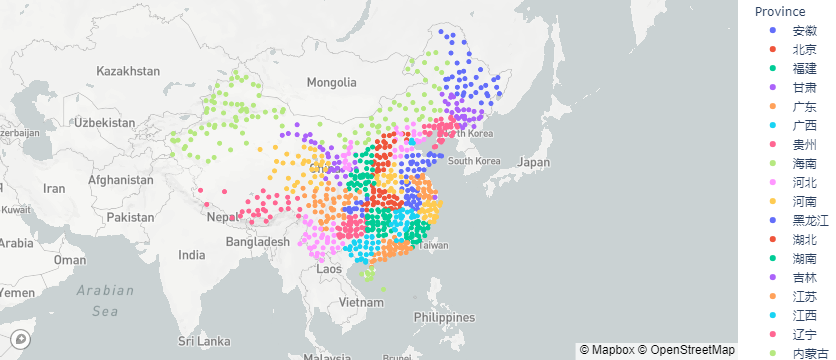

In [37]:
locations['Text'] = locations[['Province', 'Name', 'ID']].apply(', '.join, axis=1)
fig = px.scatter_mapbox(
    locations,
    lon='Longitude',
    lat='Latitude',
    color='Province',
#     size=3,
    hover_name='Text',
    zoom=2,
    height=300
)
fig.update_layout(**mapbox)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [38]:
def fetch_data(ID, year):
    ID = f'{ID}'

    # Trigger backend service,
    # the single mode (ation='one') does NOT work, and I do NOT know why,
    # it seems a bug on their web-site.
    url=r"http://data.sheshiyuanyi.com/WeatherData/php/downloadWeatherData.php"
    Params=dict(
        action='more',
        index='air_temperature',
        month='0',
        staNum=f'{ID}-{ID}',
        subIndex='avg_tem',
        year=f'{year}',
    )
    Headers={"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36"}
    response=requests.get(url=url,params=Params,headers=Headers)
    
    # Download excel,
    # it seems the backend is fast enough on preparing the data,
    # so there are NOT necessary to put some delay ^_^.
    template_url = 'http://data.sheshiyuanyi.com/WeatherData/datafile/{ID}-{ID}_avg_tem_{year}_0.xlsx'
    try:
        url = template_url.format(**dict(ID=ID, year=year))
        display(url)
        frame = pd.read_excel(url)
    except Exception:
        traceback.print_exc()
        return None
    
    frame.columns = ['ID', 'Year', 'Month', 'Day', 'Temp']
    
    # It seems the .php method in original URL is different from initialized designed,
    # it has NO single mode any more,
    # which means you just put ID-ID format to the backend,
    # and the backend will automatically generate data of the ID,
    # and the single mode with action='one' has been deprecated.
    
#     frame.index = range(len(frame))
    return frame

In [39]:
locations

,Province,ID,Name,Latitude,Longitude,Height,Text
0,安徽,58015,砀山,34.27,116.20,44.2,"安徽, 砀山, 58015"
1,安徽,58102,亳州,33.47,115.44,39.1,"安徽, 亳州, 58102"
2,安徽,58118,蒙城,33.16,116.31,26.0,"安徽, 蒙城, 58118"
3,安徽,58122,宿州,33.38,116.59,25.9,"安徽, 宿州, 58122"
4,安徽,58203,阜阳,32.52,115.44,32.7,"安徽, 阜阳, 58203"
...,...,...,...,...,...,...,...
834,重庆,57520,长寿,29.50,107.04,377.6,"重庆, 长寿, 57520"
835,重庆,57523,丰都,29.51,107.44,290.5,"重庆, 丰都, 57523"
836,重庆,57536,黔江,29.31,108.46,786.9,"重庆, 黔江, 57536"
837,重庆,57612,綦江,29.00,106.39,474.7,"重庆, 綦江, 57612"


In [49]:
locations.query('ID=="54416"')

,Province,ID,Name,Latitude,Longitude,Height,Text
25,北京,54416,密云,40.23,116.52,71.8,"北京, 密云, 54416"


-----------------


Province                福建
ID                   58754
Name                    福鼎
Latitude              27.2
Longitude           120.12
Height                36.2
Text         福建, 福鼎, 58754
Name: 33, dtype: object

-----------------


'http://data.sheshiyuanyi.com/WeatherData/datafile/58754-58754_avg_tem_2018_0.xlsx'

'http://data.sheshiyuanyi.com/WeatherData/datafile/58754-58754_avg_tem_2019_0.xlsx'

,ID,Year,Month,Day,Temp,Date
0,58754,2018,1,1,9.1,0
1,58754,2018,1,2,13.4,1
2,58754,2018,1,3,14.8,2
3,58754,2018,1,4,11.6,3
4,58754,2018,1,5,11.6,4
...,...,...,...,...,...,...
359,58754,2019,12,27,10.8,359
360,58754,2019,12,28,10.1,360
361,58754,2019,12,29,14.8,361
362,58754,2019,12,30,15.2,362


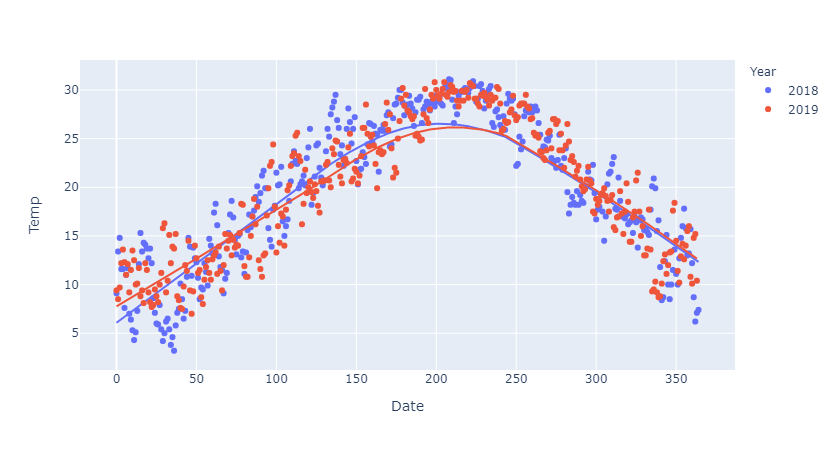

In [73]:
def get_series_by_ID(ID):
    return locations.query(f'ID=="{ID}"').iloc[0]

def get_series_by_iloc(iloc):
    return locations.iloc[iloc]

series = get_series_by_iloc(33)
# series = get_series_by_ID(54416)
print('-----------------')
display(series)
print('-----------------')

ID = series['ID']
t2018 = fetch_data(ID, 2018)
t2019 = fetch_data(ID, 2019)
t = pd.concat([t2018, t2019])

def foo(e):
    # Cancel incorrect values
    if e > 100:
        return np.nan
    return e
t.Temp = t.Temp.map(foo)
t['Year'] = t['Year'].astype(str)
# t['Month'] = t['Month'].astype(str)
t['Date'] = t.index
display(t)

fig = px.scatter(
    t,
    x='Date',
    y='Temp',
    color='Year',
    trendline='lowess',
)
fig.show()

